In [1]:
# improting the dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.datasets
from sklearn.model_selection import train_test_split

from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
#import Boston house price dataset

dataset = sklearn.datasets.load_boston()

df = pd.DataFrame(dataset.data,columns = dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
# add the target(price) column to df

df["price"] = dataset.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# number of row and column 

df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# dataset column name means

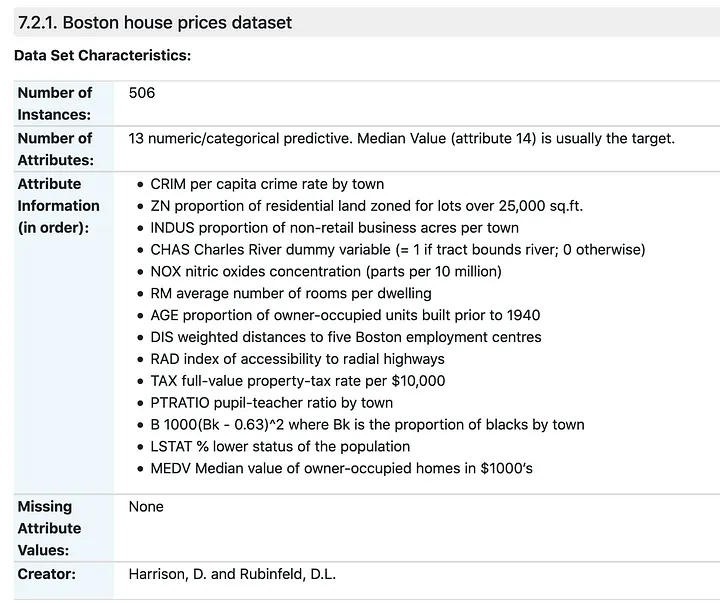

In [6]:
# check for missing values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [7]:
# summerization or statistical measures of the dataset

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

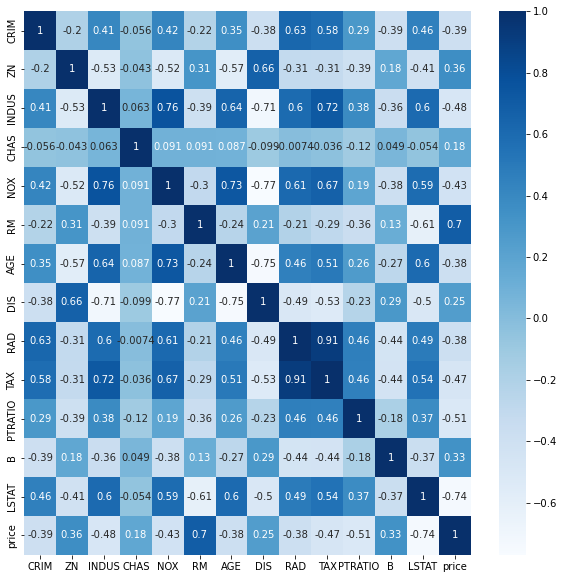

In [8]:
# corrolation between features

corrolation= df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrolation, annot=True, cmap="Blues")

In [9]:
# Splitting the data and targer

x = df.drop(["price"],axis=1)
y = df.price



In [10]:
#splitting the data into training and testing

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

print(x.shape, x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(506, 13) (404, 13) (102, 13) (404,) (102,)


In [11]:
# loading the model
model = LinearRegression()

# training the model with x_train
model.fit(x_train, y_train)

LinearRegression()

In [12]:
# pridict on trining data
y_pred_train= model.predict(x_train)

In [13]:
# r squared error means it it o or close to 0 then the model performing well
score_1 = metrics.r2_score(y_train, y_pred_train)

# mean absolute error means It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.
score_2 = metrics.mean_absolute_error(y_train, y_pred_train)

print("r squared error: ",score_1)
print("mean squared erron",score_2)

r squared error:  0.7285831776605591
mean squared erron 3.3844575399167964


In [14]:
# predict on testing data
y_pred = model.predict(x_test)

# now lets see how well model work in testing data

#r square error
score_1 = metrics.r2_score(y_test,y_pred)

#mean absolute error
score_2 = metrics.mean_absolute_error(y_test,y_pred)

print("r square error : ",score_1)
print("Mean absolute error : ",score_2)

r square error :  0.7789207451814422
Mean absolute error :  3.113043746893421


In [15]:
# so we can see in the testing data set the model pritty good can pradict the prediction (y_pred).
# r_square error is almost same as on training dataset
# it we increase the data on dataset the model will be more better

In [16]:
print(model.intercept_)

37.199807742649824


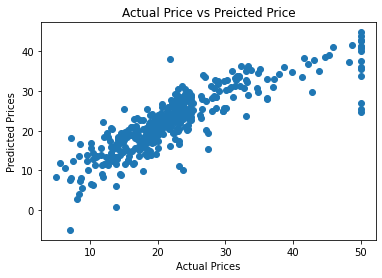

In [17]:
# in training data vs prediction
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

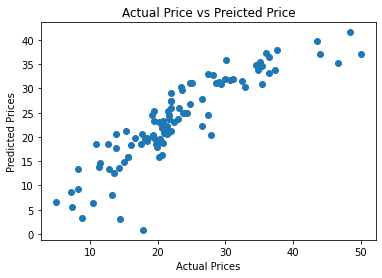

In [18]:
# in testing data vs prediction
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# lets try with xgboost model

In [19]:
# loading model
model_x = XGBRegressor()

# trainning model with x_train
model_x.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [20]:
# predict the model with trainnig  data

y_pred_tr = model_x.predict(x_train) 

In [21]:
# r squared error
score_1 = metrics.r2_score(y_train,y_pred_tr)

# mean absulate error
score_2 = metrics.mean_absolute_error(y_train,y_pred_tr)

print("r squared error:", score_1)
print("mean absolute error: ", score_2)

r squared error: 0.9999948236320982
mean absolute error:  0.0145848437110976


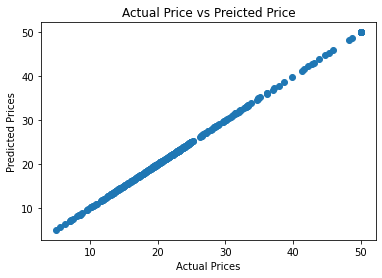

In [22]:
# in training data vs prediction
plt.scatter(y_train, y_pred_tr)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [23]:
# predict model with testing data
y_pred_te = model_x.predict(x_test)

In [24]:
# r squared error
score_1 = metrics.r2_score(y_test,y_pred_te)

# mean absulate error
score_2 = metrics.mean_absolute_error(y_test,y_pred_te)

print("r squared error:", score_1)
print("mean absolute error: ", score_2)

r squared error: 0.8711660369151691
mean absolute error:  2.2834744154238233


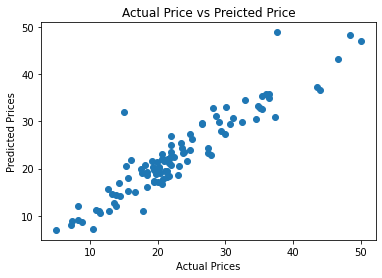

In [25]:
# in testing data vs prediction
plt.scatter(y_test, y_pred_te)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

# conclution this dataset work better on xgboost then linear_regression